Import all libraries needed: numpy for easy computations, matplotlib for plots

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.matlib as nml

Create the two balls problem

In [6]:
n = 100
d = 2
c = 3
Xp = nml.randn(int(n/2), d) + c
Xn = nml.randn(int(n/2), d) - c
X = np.concatenate((Xp, Xn), axis=0)


Yp = np.ones((int(n/2),1)) # targets: positives
Yn = -np.ones((int(n/2),1)) # targets: negatives
Y = np.concatenate((Yp,Yn),axis=0) # targets

In order to do normalization we import sklearn.preprocessing which containts all preprocessing things we need

In [8]:
from sklearn import preprocessing

scalerX = preprocessing.MinMaxScaler() # create a scalar normalizing the data btw 0 and 1
X = scalerX.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


After normalization step, we can train our model:
- create the model using libraries such as Ridge -> create Ridge algorithm setting up Alpha (that in theory is lambda) 
- fit the model on the data passing the training example (X,Y)
- train the model (it will return a Ridge model)
- plot the separator

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


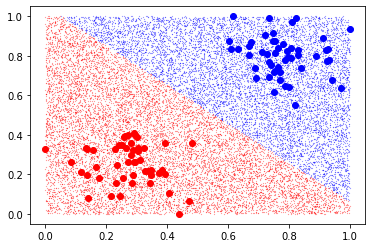

In [14]:
from sklearn.linear_model import Ridge

# create the Ridge model
M = Ridge(alpha = 1)
M.fit(X,Y)

# plot points
fig, ax = plt.subplots()
ax.plot(X[(Y>0).flatten(),0],X[(Y>0).flatten(),1],'bo')
ax.plot(X[(Y<0).flatten(),0],X[(Y<0).flatten(),1],'ro')

# training phase
ns = 20000
XS = nml.rand(ns,d) 
YS = M.predict(XS)

# plot points
ax.plot(XS[(YS>0).flatten(),0],XS[(YS>0).flatten(),1],'b.', markersize=.3)
ax.plot(XS[(YS<0).flatten(),0],XS[(YS<0).flatten(),1],'r.', markersize=.3)

Now we change the model and use kernels.
As we saw in previous laboratories, if gamma is set to a too high values (for example 100) results will be worse

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


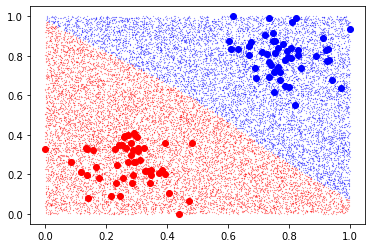

In [23]:
from sklearn.kernel_ridge import KernelRidge

# create the KernelRidge model
M = KernelRidge(alpha = 1, kernel = 'rbf', gamma = 10)
M.fit(X,Y)

# plot points
fig, ax = plt.subplots()
ax.plot(X[(Y>0).flatten(),0],X[(Y>0).flatten(),1],'bo')
ax.plot(X[(Y<0).flatten(),0],X[(Y<0).flatten(),1],'ro')

# training phase
ns = 20000
XS = nml.rand(ns,d) 
YS = M.predict(XS)

# plot points
ax.plot(XS[(YS>0).flatten(),0],XS[(YS>0).flatten(),1],'b.', markersize=.3)
ax.plot(XS[(YS<0).flatten(),0],XS[(YS<0).flatten(),1],'r.', markersize=.3)

We validate our results:
- split data in train and validation
  - getting to know how much data I have: size among the first dimension
  - sampling without replacement from n all the elements in order to obtain a permutation
  - dividing that permutation in two sets: 70% for training and 30% for validation

All these steps can be done using grid:
- creating a dictionary for setting grid parameters
- creating an object MS which will take in input 
  (grid, algorithm, quality measure, how many data to use for the split, ...)
  return the optimal configuration of the grid 
- train the model with the optimal object